# Convolution

Astropy provides methods for convolution with added benefits over those in the base `scipy` package.

In [8]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [9]:
from astropy.io import fits
from astropy.convolution import convolve, convolve_fft

In [56]:
data = fits.getdata('../data/502nmos.fits')

In [57]:
data[data>50] = 50


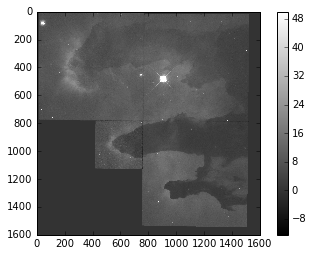

In [58]:
plt.imshow(data, cmap='gray')
plt.colorbar()

In [59]:
from astropy.convolution import Gaussian2DKernel

In [81]:
gauss = Gaussian2DKernel(stddev=2)

In [84]:
cdata = convolve(data, gauss, boundary='extend')

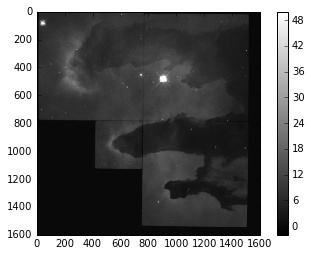

In [85]:
plt.imshow(cdata, cmap='gray',)
plt.colorbar()

### Smoothing 1D data

In [67]:
from astropy.modeling.models import Lorentz1D

from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel

In [68]:
lorentz = Lorentz1D(1, 0, 1)
x = np.linspace(-5, 5, 100)
data_1D = lorentz(x) + 0.1 * (np.random.rand(100) - 0.5)

In [73]:
gauss_kernel = Gaussian1DKernel(2)
smoothed_data_gauss = convolve(data_1D, gauss_kernel)

In [74]:
box_kernel = Box1DKernel(5)
smoothed_data_box = convolve(data_1D, box_kernel)

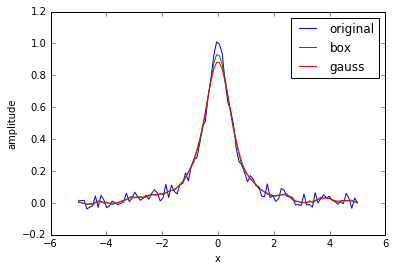

In [80]:
plt.plot(x,data_1D)
plt.plot(x,smoothed_data_box)
plt.plot(x,smoothed_data_gauss)

plt.legend(['original','box','gauss'])
plt.xlabel('x')
plt.ylabel('amplitude')